In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

In [65]:
data_set=pd.read_csv("인적사항 인코딩.csv",encoding='cp949')

# 다중공산성 확인

In [66]:
data_set

,Unnamed: 0,요일,피해운전자 성별,연령대,주간야간,가을,겨울,봄,여름,교차로,기타,단일로,미분류,주차장,기타차량,승용,승합,이륜,특수차,피해운전자 상해정도
0,0,0,0.0,50,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,경상
1,1,0,0.0,70,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,사망
2,2,0,0.0,50,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,중상
3,3,0,0.0,60,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,중상
4,4,0,0.0,80,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,9125,0,1.0,70,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,중상
9126,9126,0,1.0,50,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,중상
9127,9127,1,0.0,30,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,경상
9128,9128,0,0.0,50,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,경상


In [67]:
data_set=data_set.drop('Unnamed: 0',axis=1)
#불필요한 데이터 셋 제거

In [68]:
data_set.head(5)

,요일,피해운전자 성별,연령대,주간야간,가을,겨울,봄,여름,교차로,기타,단일로,미분류,주차장,기타차량,승용,승합,이륜,특수차,피해운전자 상해정도
0,0,0.0,50,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,경상
1,0,0.0,70,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,사망
2,0,0.0,50,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,중상
3,0,0.0,60,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,중상
4,0,0.0,80,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,경상


In [69]:
data_set.info()
#데이터의 컬럼 정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9130 entries, 0 to 9129
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   요일          9130 non-null   int64  
 1   피해운전자 성별    9130 non-null   float64
 2   연령대         9130 non-null   int64  
 3   주간야간        9130 non-null   int64  
 4   가을          9130 non-null   int64  
 5   겨울          9130 non-null   int64  
 6   봄           9130 non-null   int64  
 7   여름          9130 non-null   int64  
 8   교차로         9130 non-null   int64  
 9   기타          9130 non-null   int64  
 10  단일로         9130 non-null   int64  
 11  미분류         9130 non-null   int64  
 12  주차장         9130 non-null   int64  
 13  기타차량        9130 non-null   int64  
 14  승용          9130 non-null   int64  
 15  승합          9130 non-null   int64  
 16  이륜          9130 non-null   int64  
 17  특수차         9130 non-null   int64  
 18  피해운전자 상해정도  9130 non-null   object 
dtypes: float64(1), int64(17), o

In [70]:
data_set['피해운전자 상해정도'].value_counts()
#피해 상해정도 확인

중상      5206
경상      3000
사망       482
부상신고     416
상해없음      26
Name: 피해운전자 상해정도, dtype: int64

In [71]:
data_set['피해운전자 상해정도']=data_set['피해운전자 상해정도'].map({'상해없음':0,'부상신고':1,'경상':2,'중상':3,'사망':4})
#데이터 라벨 인코딩

In [72]:
data_set

,요일,피해운전자 성별,연령대,주간야간,가을,겨울,봄,여름,교차로,기타,단일로,미분류,주차장,기타차량,승용,승합,이륜,특수차,피해운전자 상해정도
0,0,0.0,50,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2
1,0,0.0,70,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,4
2,0,0.0,50,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,3
3,0,0.0,60,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,3
4,0,0.0,80,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,0,1.0,70,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,3
9126,0,1.0,50,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,3
9127,1,0.0,30,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2
9128,0,0.0,50,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2


In [73]:
x=data_set.drop('피해운전자 상해정도',axis=1)
y=data_set['피해운전자 상해정도']
#테스트 데이터 셋 확인

In [74]:
x

,요일,피해운전자 성별,연령대,주간야간,가을,겨울,봄,여름,교차로,기타,단일로,미분류,주차장,기타차량,승용,승합,이륜,특수차
0,0,0.0,50,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0.0,70,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0.0,50,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0.0,60,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0.0,80,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,0,1.0,70,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
9126,0,1.0,50,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
9127,1,0.0,30,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
9128,0,0.0,50,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

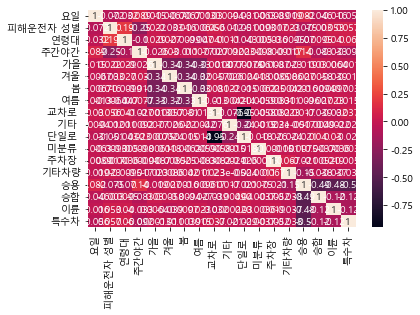

In [75]:
sns.heatmap(x.corr(),annot=True)
#각 피쳐별 상관관계 확인 

In [76]:
x.corr()

,요일,피해운전자 성별,연령대,주간야간,가을,겨울,봄,여름,교차로,기타,단일로,미분류,주차장,기타차량,승용,승합,이륜,특수차
요일,1.000000,-0.071518,-0.032117,0.089021,0.014725,-0.006704,-0.006745,-0.001339,0.029756,0.009375,-0.031445,-0.006310,-0.008924,-0.019097,0.082434,-0.046445,-0.015837,-0.055813
피해운전자 성별,-0.071518,1.000000,0.188667,-0.253435,0.022495,-0.032939,0.016391,-0.006374,0.056377,-0.011804,-0.051013,-0.009343,0.001684,0.022620,-0.075281,-0.003000,0.052866,0.057082
연령대,-0.032117,0.188667,1.000000,-0.101526,0.029053,0.026676,-0.009882,-0.046562,0.040659,0.010905,-0.042996,-0.005007,0.003610,-0.009510,-0.069721,0.009523,0.039908,0.059799
주간야간,0.089021,-0.253435,-0.101526,1.000000,-0.025856,0.030114,-0.011498,0.007660,-0.027083,0.009242,0.023262,0.009843,-0.000910,-0.016904,0.141085,-0.082633,-0.032809,-0.092232
가을,0.014725,0.022495,0.029053,-0.025856,1.000000,-0.336533,-0.343633,-0.328249,-0.001261,0.007729,-0.000751,-0.006119,-0.008655,-0.023477,-0.018660,0.029903,0.006352,0.000127
겨울,-0.006704,-0.032939,0.026676,0.030114,-0.336533,1.000000,-0.338281,-0.323137,0.005662,-0.025719,0.002397,0.018184,-0.008520,0.008565,0.026642,0.005794,-0.038693,-0.011142
봄,-0.006745,0.016391,-0.009882,-0.011498,-0.343633,-0.338281,1.000000,-0.329954,0.008126,0.021838,-0.015460,-0.006151,0.025186,0.004180,0.001579,-0.009428,0.009722,-0.003862
여름,-0.001339,-0.006374,-0.046562,0.007660,-0.328249,-0.323137,-0.329954,1.000000,-0.012762,-0.004189,0.014160,-0.005876,-0.008310,0.011011,-0.009553,-0.026744,0.022758,0.015107
교차로,0.029756,0.056377,0.040659,-0.027083,-0.001261,0.005662,0.008126,-0.012762,1.000000,-0.076296,-0.949106,-0.005763,-0.008150,0.022603,0.016909,-0.039417,-0.031603,0.036796
기타,0.009375,-0.011804,0.010905,0.009242,0.007729,-0.025719,0.021838,-0.004189,-0.076296,1.000000,-0.238853,-0.001450,-0.002051,0.000023,0.016988,-0.004930,0.000222,-0.020854


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features']=x.columns
vif=vif.sort_values("VIF FACTOR").reset_index(drop=True)
vif
#다중공산성 확인 다중공산성이 있을수록 모델 학습에 안좋은 영향을 미치기 때문에 

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF FACTOR,Features
0,1.018085,요일
1,1.049027,연령대
2,1.096696,주간야간
3,1.109990,피해운전자 성별
4,inf,승합
5,inf,승용
6,inf,기타차량
7,inf,주차장
8,inf,미분류
9,inf,단일로


In [78]:
data_set1=data_set[["요일","연령대","주간야간","피해운전자 성별","피해운전자 상해정도"]]
data_set1
#다중공산성 제거한 특징 데이터셋 생성

,요일,연령대,주간야간,피해운전자 성별,피해운전자 상해정도
0,0,50,1,0.0,2
1,0,70,1,0.0,4
2,0,50,1,0.0,3
3,0,60,0,0.0,3
4,0,80,0,0.0,2
...,...,...,...,...,...
9125,0,70,0,1.0,3
9126,0,50,1,1.0,3
9127,1,30,1,0.0,2
9128,0,50,1,0.0,2


# 불균형 해소 
 클래스 레이블 확인결과 경상 중상이 가장 많아 학습시 과적합이 발생 할 수 있기 때문에 불균형 해소 실시

오버샘플링

In [79]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#SMOTE 오버샘플링이 한 기법으로 낮은 비율로 존재하는 클래스의 데이터를 최근접 이웃 알고리즘을
#활용하여 새롭게 생성하는 기법

In [80]:
X=data_set1.drop("피해운전자 상해정도",axis=1)
y=data_set1["피해운전자 상해정도"]

In [81]:
X1=data_set.drop("피해운전자 상해정도",axis=1)
y1=data_set1["피해운전자 상해정도"]

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=1)

In [83]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,train_size=0.8,random_state=1)

In [84]:
smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X_train,y_train)

In [85]:
smote=SMOTE(random_state=42)
X_smote1,y_smote1=smote.fit_resample(X1_train,y1_train)

# 디시젼트리

In [86]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델 중 하나입니다. 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다.

In [87]:
classifier=DecisionTreeClassifier(max_depth=10,splitter='best',min_samples_split=3)

In [88]:
classifier.fit(X_smote,y_smote)

DecisionTreeClassifier(max_depth=10, min_samples_split=3)

In [89]:
pred=classifier.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.26013143483023


In [91]:
classifier.fit(X_smote1,y_smote1)

DecisionTreeClassifier(max_depth=10, min_samples_split=3)

In [92]:
pred=classifier.predict(X1_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y1_test,pred))

0.3833515881708653


In [93]:
from sklearn.metrics import *

In [94]:
print(confusion_matrix(y1_test, pred))
precision = precision_score(y1_test, pred,average= "weighted")
recall = recall_score(y1_test, pred,average= "weighted")
print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))
#모델의 과적합을 확인하기 위해 정밀도 및 재현율 확인

[[  2   1   0   3   1]
 [  0  29  21  22   9]
 [ 10 103 251 174  51]
 [  8 247 271 388 139]
 [  0  15  15  36  30]]
정밀도: 0.5147, 재현율: 0.3834


# 랜덤포레스트

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
RandomForestClassifier()

RandomForestClassifier()

랜덤포레스트는 지도머신러닝 알고리즘으로 정확성 단순성 유연성 인해 가장 많이 사용되는 알고리즘 중 하나입니다. 분류 및 회귀작업에 사용되어있고 비선형 특성을 결합할시 다양한 데이터 및 상황에 적합합니다

In [97]:
rf=RandomForestClassifier(n_estimators=500,max_features='sqrt',n_jobs=-1,max_depth=50,criterion='entropy')
rf.fit(X_smote,y_smote)
pred1=rf.predict(X_test)
print(accuracy_score(y_test,pred1))#모델 호출및 학습 과 예측 점수확인

0.2617743702081051


In [98]:
model = RandomForestClassifier()
model.fit(X_smote1,y_smote1)
pred1=model.predict(X1_test)
print(accuracy_score(y1_test,pred1))# #모델 호출및 학습 과 예측 점수확인

0.46276013143483025


특성 중요도 종속변수에 미치는 독립변수(피처)의 영향력을 알아보기 위해 확인
값이 높을수록 종속변수에 큰 영향을 미친다

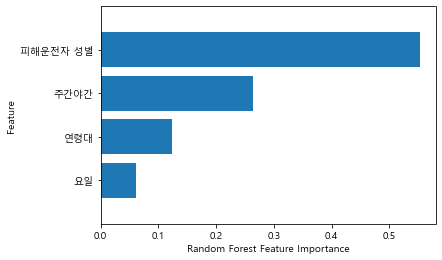

In [99]:
def plot_feature_importance(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(rf)

In [100]:
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]

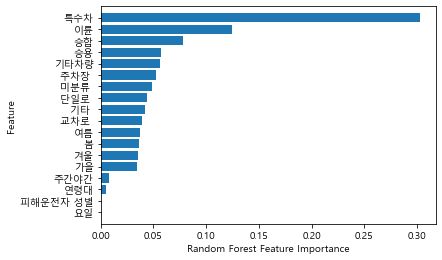

In [101]:
def plot_feature_importance(model):
    n_features = X1_train.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), X1_train.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(model)

In [102]:
print(confusion_matrix(y1_test, pred1))
precision = precision_score(y1_test, pred1,average= "weighted")
recall = recall_score(y1_test, pred1,average= "weighted")
print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))
#모델의 과적합을 확인하기 위해 정밀도 및 재현율 확인

[[  2   0   1   3   1]
 [  0  26  23  25   7]
 [  4  59 270 219  37]
 [  6 145 292 519  91]
 [  0   9  14  45  28]]
정밀도: 0.5286, 재현율: 0.4628


# LightBGM

Light GBM은 Tree가 수직적으로 확장됩니다. 즉 Light GBM은 leaf-wise 인 반면 다른 알확장하기 위해서 max delta loss를 가진 leaf를 선택하게 되는 것이죠. 동일한 leaf를 확장할 때, leaf-wise 알고리즘은 level-wise 알고리즘보다 더 많은 loss, 손실을 줄일 수 있습니다.

In [103]:
import lightgbm
lig=lightgbm.LGBMClassifier()
lig.fit(X_smote,y_smote)
pred2=lig.predict(X_test)
print(accuracy_score(y_test,pred2))#모델 학습및 점수확인

0.26013143483023


In [104]:
lig=lightgbm.LGBMClassifier()
lig.fit(X_smote1,y_smote1)
pred2=lig.predict(X1_test)
print(accuracy_score(y1_test,pred2))#모델 학습및 점수확인

0.45618838992332966


In [105]:
lig1=lightgbm.LGBMClassifier(n_estimators=2000,learing_rate=0.1,max_depth=-1)
#반복2000번 학습률 0.1 최대깊이는 모델이 최적값을 선정

In [106]:
lig1.fit(X_smote1,y_smote1)

[LightGBM] [Warning] Unknown parameter: learing_rate


LGBMClassifier(learing_rate=0.1, n_estimators=2000)

In [107]:
pred3=lig1.predict(X1_test)

In [108]:
print(accuracy_score(y_test,pred3))

0.4539978094194962


In [109]:
from sklearn.metrics import *

점수가 높아도 정밀도 재현율이 낮으면 소용없기 때문에 정밀도 재현율 확인한다

In [111]:
print(confusion_matrix(y1_test, pred3))
precision = precision_score(y1_test, pred3,average= "weighted")
recall = recall_score(y1_test, pred3,average= "weighted")
print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))

[[  2   0   1   3   1]
 [  0  28  20  26   7]
 [  4  60 263 225  37]
 [  6 142 296 509 100]
 [  0   9  16  44  27]]
정밀도: 0.5202, 재현율: 0.4540


# XGBOOST

알고리즘을 분산환경에서도 실행할 수 있도록 구현해놓은 라이브러리이다. Regression, Classification 문제를 모두 지원하며, 성능과 자원 효율이 좋아서, 인기 있게 사용되는 알고리즘이고 여러개의 결정트리를 조합해서 사용하는 앙상블 알고리즘입니다

In [165]:
!pip install xgboost

In [112]:
from xgboost import XGBClassifier
#모델호출

In [113]:
model=XGBClassifier()

In [114]:
my_model =XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=400)

In [116]:
my_model.fit(X_smote,y_smote)
#모델 학습

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [117]:
y_pred4 = my_model.predict(X_test) 
y_pred4#예측값 도출

array([1, 2, 4, ..., 4, 2, 4], dtype=int64)

In [118]:
print(accuracy_score(y_test,y_pred4))#정확도 확인

0.24260679079956188


In [119]:
my_model1 =XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=400)
#학습률은 0.1,최대깊이5로 5이상으로 가지 않기,반복400번
my_model1.fit(X_smote1,y_smote1)
pred4 = my_model1.predict(X1_test) 
pred4

array([3, 1, 3, ..., 3, 2, 3], dtype=int64)

In [120]:
print(accuracy_score(y_test,pred4))

0.4534501642935378


In [121]:
print(confusion_matrix(y1_test, pred4))
precision = precision_score(y1_test, pred4,average= "weighted")
recall = recall_score(y1_test, pred4,average= "weighted")
print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))

[[  2   1   0   3   1]
 [  0  20  28  27   6]
 [  3  70 268 212  36]
 [  6 142 292 514  99]
 [  0  10  14  48  24]]
정밀도: 0.5242, 재현율: 0.4535


# 예측결과
ligthgbm으로 예측확인